In [1]:
from eda_imports import *

In [2]:
import word2vec

In [3]:
# %time model = word2vec.load('./PubMed-w2v.bi')
%time model = word2vec.load('./wikipedia-pubmed-and-PMC-w2v.bin')

CPU times: user 3min 2s, sys: 6.62 s, total: 3min 9s
Wall time: 3min 20s


In [10]:
with open('/projects/btl/zxue/tasrkleat-TCGA-results/firebrowse-data/bulk_rsem/data/fb-rsem-genes.txt', 'rt') as inf:
    RSEM_GENES = inf.read().splitlines()

In [12]:
RSEM_GENES = list(sorted(set([_.split('|')[0] for _ in RSEM_GENES])))

In [4]:
model.vocab.shape

(5443656,)

In [5]:
model.vectors.shape

(5443656, 200)

In [13]:
tokens = []
for k, g in enumerate(RSEM_GENES):
    try:
        indexes, metrics = model.cosine(g, n=15)
        nearby_tokens = model.vocab[indexes].tolist()
        tokens.extend(nearby_tokens)
    except:
        print(k, g, end=',')
#     if (k + 1) % 100 == 0:
#         print('{0} genes processed'.format(k + 1), end=',')

12 AACSL,14 AADACL2,15 AADACL3,16 AADACL4,24 AARSD1,33 ABCA11P,85 ABHD12B,88 ABHD14B,89 ABHD15,128 ACAP3,135 ACBD7,140 ACCN5,142 ACCSL,174 ACPL2,195 ACSM5,218 ACTR1B,222 ACTR3C,224 ACTR6,225 ACTR8,226 ACTRT1,227 ACTRT2,240 ADAD2,252 ADAM21P1,300 ADCK1,303 ADCK5,328 ADIG,368 AFARP1,385 AGAP4,386 AGAP5,387 AGAP6,388 AGAP7,389 AGAP8,392 AGBL3,393 AGBL4,397 AGFG2,401 AGMAT,428 AHDC1,441 AIF1L,447 AIM1L,466 AKAP14,476 AKD1,477 AKIRIN1,480 AKNAD1,491 AKR1E2,494 AKR7L,534 ALG1L,535 ALG1L2,548 ALKBH6,553 ALMS1P,556 ALOX12P2,571 ALS2CR11,572 ALS2CR12,573 ALS2CR4,579 AMAC1L2,580 AMAC1L3,587 AMDHD2,594 AMIGO1,598 AMMECR1L,615 AMZ2P1,620 ANAPC16,626 ANGEL1,627 ANGEL2,647 ANKHD1-EIF4EBP3,651 ANKLE2,652 ANKMY1,653 ANKMY2,656 ANKRD10,660 ANKRD13B,662 ANKRD13D,663 ANKRD16,665 ANKRD19,667 ANKRD20A3,668 ANKRD20A4,669 ANKRD20B,672 ANKRD24,674 ANKRD26P1,677 ANKRD29,679 ANKRD30B,680 ANKRD31,681 ANKRD32,683 ANKRD34A,684 ANKRD34B,685 ANKRD34C,687 ANKRD36,689 ANKRD36BP1,691 ANKRD39,692 ANKRD40,693 ANKRD42,694

In [24]:
uniq_tokens = set(tokens)

In [18]:
len(uniq_tokens)

65469

In [19]:
X = model.vectors

In [20]:
X.shape

(5443656, 200)

In [21]:
df_X = pd.DataFrame(X)

In [22]:
df_X.set_index(model.vocab, inplace=True)

In [26]:
%time sub_X = df_X.loc[uniq_tokens]

CPU times: user 3.3 s, sys: 6.57 s, total: 9.87 s
Wall time: 12.6 s


In [27]:
sub_X.shape

(65469, 200)

In [19]:
# %time X_reduced = TruncatedSVD(n_components=50).fit_transform(X)
# X_reduced.shape

In [28]:
X_reduced = sub_X.values

In [29]:
X_reduced.shape

(65469, 200)

In [30]:
random_state = np.random.randint(0, 1e9)
print('random_state: {0}'.format(random_state))
%time X_embedded = TSNE(n_components=2, perplexity=50, learning_rate=50000, random_state=random_state, metric='cosine', verbose=True).fit_transform(X_reduced)

random_state: 488619231
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 65469
[t-SNE] Computed conditional probabilities for sample 2000 / 65469
[t-SNE] Computed conditional probabilities for sample 3000 / 65469
[t-SNE] Computed conditional probabilities for sample 4000 / 65469
[t-SNE] Computed conditional probabilities for sample 5000 / 65469
[t-SNE] Computed conditional probabilities for sample 6000 / 65469
[t-SNE] Computed conditional probabilities for sample 7000 / 65469
[t-SNE] Computed conditional probabilities for sample 8000 / 65469
[t-SNE] Computed conditional probabilities for sample 9000 / 65469
[t-SNE] Computed conditional probabilities for sample 10000 / 65469
[t-SNE] Computed conditional probabilities for sample 11000 / 65469
[t-SNE] Computed conditional probabilities for sample 12000 / 65469
[t-SNE] Computed conditional probabilities for sample 13000 / 65469
[t-SNE] Computed c

In [23]:
X_embedded.shape

(10000, 2)

In [24]:
df_em = pd.DataFrame(X_embedded, columns=['x', 'y'])

In [25]:
df_em['token'] = sub_X.index.values

In [57]:
df_em.to_pickle('./first_100k_tokens.pkl')

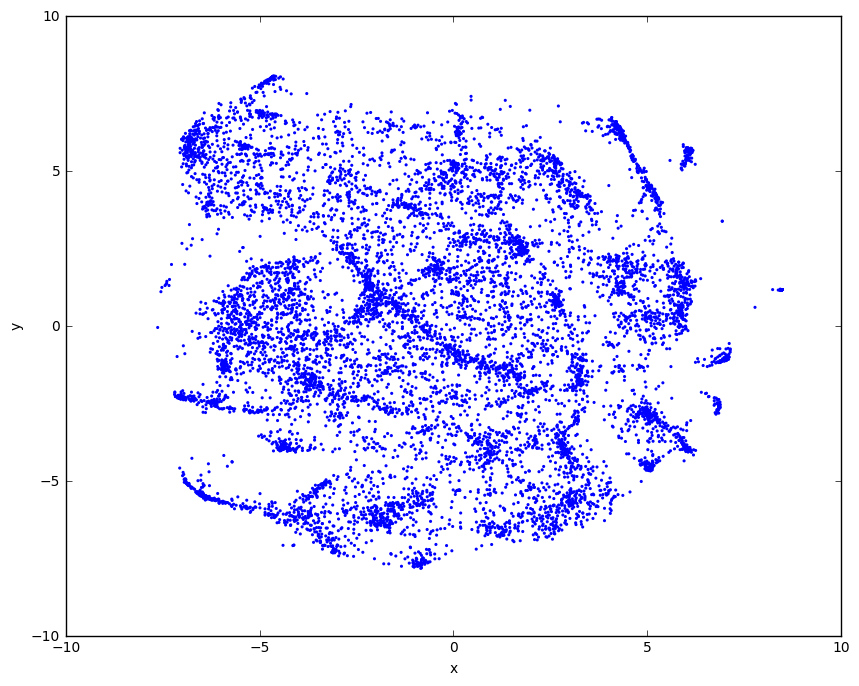

In [26]:
df_em.plot.scatter(x='x', y='y', s=5, edgecolor='none')

In [30]:
df_em.token.to_csv('./lele_tokens.csv', index=False)

In [66]:
center = df_em.query('token == "TP53"')

In [71]:
x = center.x.values[0]
y = center.y.values[0]

In [48]:
x = 5.25
y = 4.3
radius = 0.2

In [49]:
df_plot = df_em.query('{0} < x < {1}'.format(x - radius, x + radius)).query('{0} < y < {1}'.format(y - radius, y + radius))

In [51]:
indexes, metrics = model.cosine('blackberries')
print(model.vocab[indexes].tolist())

['gooseberries', 'elderberries', 'blueberries', 'strawberries', 'plums', 'currants', 'blackcurrants', 'raspberries', 'cloudberries', 'cherries']


In [59]:
indexes, metrics = model.cosine('Einstein')
print(model.vocab[indexes].tolist())

['Schweitzer', 'Szent-Gyorgyi', 'Maxwell', 'Clerk', 'Yeshiva', 'Albert', 'Trouton', 'Jacobi', 'Devonshire', 'Buckingham']


In [72]:
indexes, metrics = model.cosine('TCGA', n=15)
print(model.vocab[indexes].tolist())

['BDGP', 'DataBase', 'IRGSP', 'MSigDB', 'SeattleSNPs', 'ENCODE', 'HGDP-CEPH', 'IASLC', 'IALSC', 'Atlas', 'HapMap', 'PEDB', 'SNP500Cancer', 'ICPCG', 'PCaP']
